# La programmation orienté objet

La programmation orienté objet est constituée de trois principes de base:
1. L’encapsulation
1. L’héritage
1. Polymorphisme

Ce type de programmation est une standard de l’industrie et devrait toujours être utilisé en C# (puisque .NET est basé sur l’orienté objet).

## L’encapsulation

Le principe d’encapsulation permet au programmeur de cacher l’accès à certains membres d’une classe.

- Les membres utilisés pour le fonctionnement interne d’une classe sont habituellement privés (`private`) ou protégés (`protected`).
- Les membres utilisés pour interagir avec la classe sont habituellement publiques.

L’accès des membres est contrôlé à l’aide des modificateurs d’accès.

Un modificateur d’accès peut être placé au début de la signature d’un membre ou type.

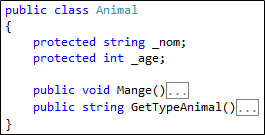

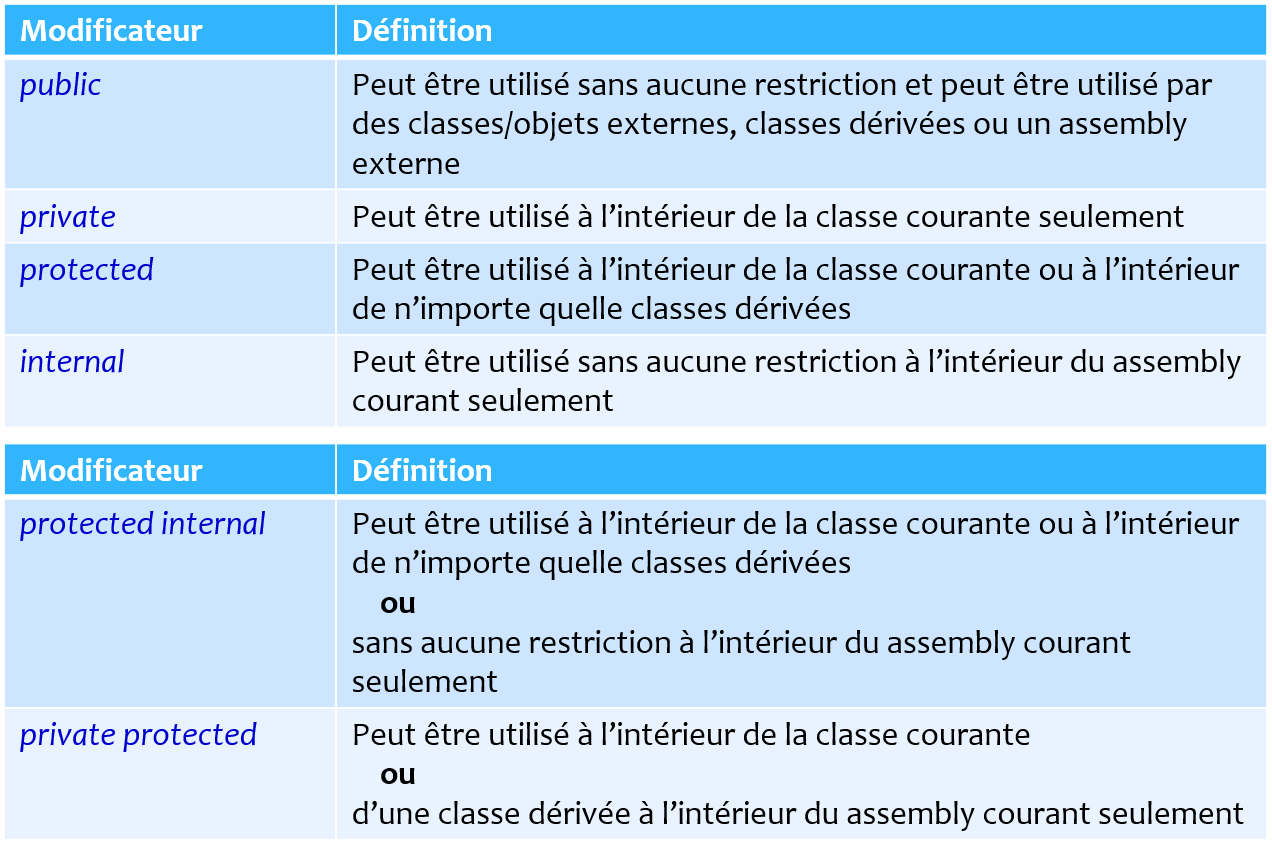

`protected internal` (C# Reference)
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/keywords/protected-internal
https://docs.microsoft.com/fr-ca/dotnet/csharp/language-reference/keywords/protected-internal

`private protected` (C# Reference)
https://docs.microsoft.com/en-us/dotnet/csharp/language-reference/keywords/private-protected
https://docs.microsoft.com/fr-ca/dotnet/csharp/language-reference/keywords/private-protected

Par défaut:
- Tous les **membres** d’une **classe** et/ou **structure** sont **privés**.
- Tous les **membres** d’une **interface** sont **publics**.
- Tous les types (`class`, `struct`, `interface`, `enum`, etc.) sont **internes**.

## L’héritage

Le principe d’héritage permet au programmeur de réutiliser la logique et/ou définition d’une classe existante pour en créer une nouvelle.

- La classe existante est habituellement appelée la classe de base ou parente
- La nouvelle classe est habituellement appelée la classe dérivée

L’héritage est habituellement utilisé pour définir des objets de base qui sont ensuite étendus dans des classes plus complexes.

La classe de base « `Animal` » comprend quatre membres:
- `_nom`: Variable membre protégée
- `_age`: Variable membre protégée
- `GetTypeAnimal`: Méthode membre publique
- `Mange`: Méthode membre publique

La classe dérivée « `Chien` » (hérite de « `Animal` ») comprend un membre d’**extra**:
- `Jappe`: Méthode membre publique

La classe dérivée « `Chat` » (hérite de « `Animal` ») comprend un membre d’**extra**:
- `Miaule`: Méthode membre publique

**Exemple:**
- Un `Chien` est un `Animal` mais un `Animal` n’est pas un `Chien`
- Un `Chat` est un `Animal` mais un `Animal` n’est pas un `Chat`

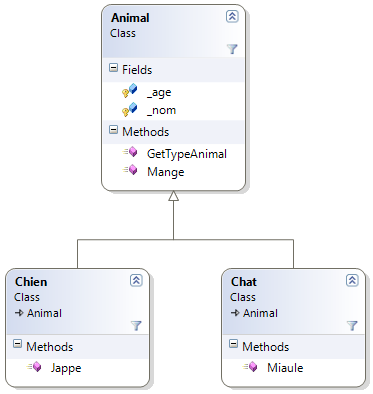

**Exemple**

En suivant le même exemple, on peut en tirer que:
- Chaque animal (`Chat` ou `Chien`) a un nom et un âge
- Chaque animal (`Chat` ou `Chien`) peut manger
- Seulement les chiens peuvent japper
- Seulement les chats peuvent miauler

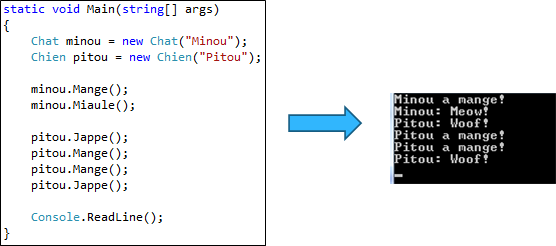

Afin de préparer une classe pour qu’elle soit une classe de base, il faut s’assurer que:

- La classe n’est pas « `sealed` » (indique que la classe est finale et ne peut pas être dérivée).
- La classe à des modificateurs d’accès permettant aux classes dérivées de l’accéder.

Une classe peut hériter d’une autre en ajoutant:

- Deux points (`:`) après le nom de la classe
- Le nom de la classe de base

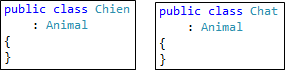

Une classe peut seulement hériter d’**une** classe à la fois.

 > Contrairement au **C++**, **Python**, **R**.

In [2]:
// ===========================================================================
// Classe Animal
// ===========================================================================
public class Animal
{
    protected string _nom;
    protected int _age;
    
    public string GetTypeAnimal()
    {
        return this.GetType().Name;
    }

    public void Mange()
    {
        Console.WriteLine("{0}: mange!", _nom);
    }
}

// ===========================================================================
// Classe Chien
// ===========================================================================
public class Chien : Animal
{
    public void Jappe()
    {
        Console.WriteLine("Woof!");
    }
}

// ===========================================================================
// Classe Chat
// ===========================================================================
public class Chat : Animal
{
    public void Miaule()
    {
        Console.WriteLine("Meow!");
    }
}


(6,22): warning CS0649: Field 'Animal._nom' is never assigned to, and will always have its default value null

(7,19): warning CS0649: Field 'Animal._age' is never assigned to, and will always have its default value 0



**Exemple**

En suivant le même exemple, on peut en tirer que:

- Chaque animal (`Chat` ou `Chien`) a un nom et un âge
- Chaque animal (`Chat` ou `Chien`) peut manger
- Seulement les chiens peuvent japper
- Seulement les chats peuvent miauler

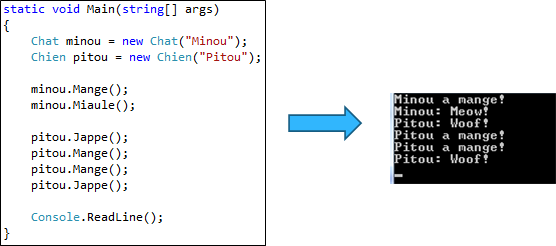

In [3]:
Chat minou = new Chat();
minou.Mange();
minou.Miaule();

Chien pitou = new Chien();
pitou.Jappe();
pitou.Mange();
pitou.Mange();
pitou.Jappe();

: mange!
Meow!
Woof!
: mange!
: mange!
Woof!


### Constructeurs

Une classe dérivée devrait toujours (fortement suggéré) appeler un constructeur de la classe de base.

Les constructeurs d’une classe de base peuvent être appelés en ajoutant:
- Deux points (`:`) après le nom d’un constructeur local (classe dérivé)
- Mot clé « `base` »
- Paramètre(s) du constructeur de base

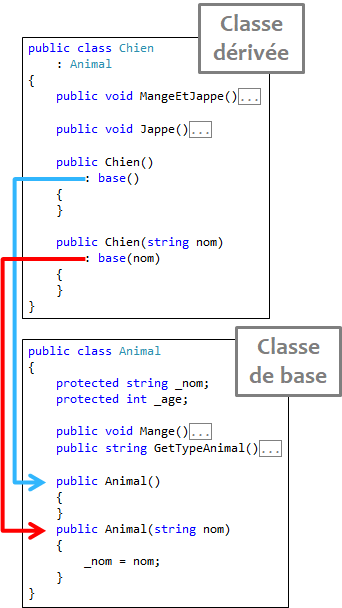

Chaque constructeur d’une classe dérivée doit appeler un des constructeurs de la classe de base si celle-ci n’a pas de constructeur par défaut

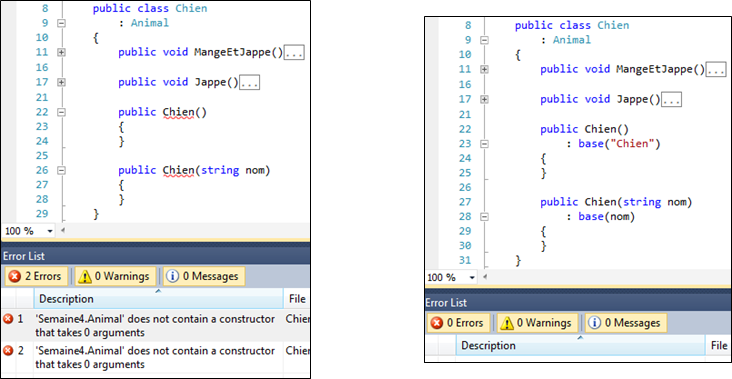

In [5]:
// ===========================================================================
// Classe Animal
// ===========================================================================
public class Animal
{
    protected string _nom;
    protected int _age;
    
    // Constructeur de la classe de base
    public Animal(string nom, int age)
    {
        this._nom = nom;
        this._age = age;
    }
    
    public string GetTypeAnimal()
    {
        return this.GetType().Name;
    }

    public void Mange()
    {
        Console.WriteLine("{0}: mange!", _nom);
    }
}

// ===========================================================================
// Classe Chien
// ===========================================================================
public class Chien : Animal
{
    // Constructeur de la classe dérivée
    public Chien(string nom, int age)
        : base(nom,  age) // Appel du constructeur de la classe de base
    {
    }
    
    public void MangeEtJappe()
    {
        base.Mange(); // Animal.Mange
        this.Jappe(); // Chien.Jappe
    }

    public void Jappe()
    {
        Console.WriteLine($"{_nom}: Woof!");
    }
}

// ===========================================================================
// Classe Chat
// ===========================================================================
public class Chat : Animal
{
    // Constructeur de la classe dérivée
    public Chat(string nom)
        : base(nom,  9) // Ici on passe '9' au constructeur de la classe de base
    {
    }

    public void Miaule()
    {
        Console.WriteLine($"{_nom}: Meow!");
    }
}

// ===========================================================================
// Main
// ===========================================================================
Chat minou = new Chat("Sylvester");
minou.Mange();
minou.Miaule();

Chien pitou = new Chien("Fido", 2);
pitou.Jappe();
pitou.Mange();
pitou.Mange();
pitou.Jappe();

Sylvester: mange!
Sylvester: Meow!
Fido: Woof!
Fido: mange!
Fido: mange!
Fido: Woof!


La conversion d’un objet à un autre type d’objet similaire/compatible est possible si:

- On convertit un objet d’une classe dérivée à une classe de base dans la même chaîne d’héritage.
- Le type de conversion (implicite/explicite) le permet.

**Exemple :**

- On peut convertir un `Chat` à un `Animal` implicitement ou explicitement
- On peut seulement convertir un `Animal` à un `Chat` explicitement
  - Une erreur va se produire durant l’exécution de l’application si l’objet de type `Animal` n’était pas un `Chat`

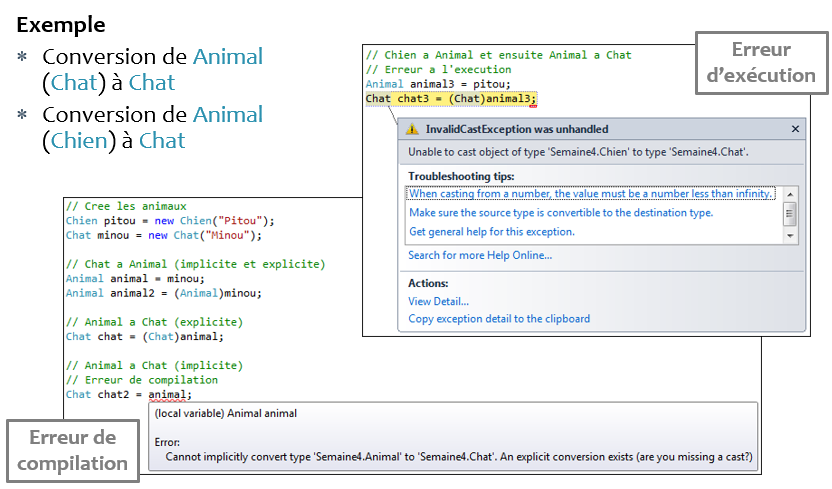

### Le mot clé « `as` »

En plus des conversions explicites et implicites, il existe un troisième type de conversion pour des objets de type « référence ».
- L’utilisation du mot clé « `as` » est similaire à une conversion explicite (puisque le type est spécifié) sauf qu’une exception n’est pas lancée si la conversion est invalide
- Dans le cas d’une conversion invalide avec le mot clé « `as` », l’objet est simplement retourné en tant que `null`.

Afin de faire une conversion de type « as », il suffit de:

1. Spécifier la variable à convertir
1. Le mot clé « `as` »
1. Le type converti

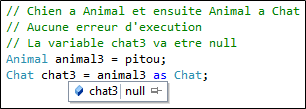

### Le mot clé « `is` »

Il est également possible de vérifier si un objet peut être converti à un autre type avant la conversion.

- L’utilisation du mot clé « `is` » permet de vérifier si l’objet est compatible avec un type spécifique.
- Une valeur `true` est retournée si l’objet est compatible avec le type et une valeur false s’il ne l’est pas.

Afin de vérifier la compatibilité d’un objet avec un type particulier, il suffit de:

1. Spécifier la variable contenant l’objet à vérifier
1. Le mot clé « `is` »
1. Le type converti

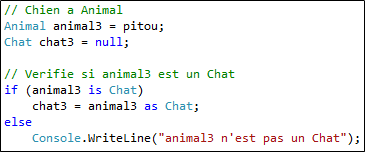

In [28]:
var pitou = new Chien("Fido", 2);
Animal animal3 = pitou;

Chat chat3 = null;

// Vérifier si animal3 est un Chat
if (animal3 is Chat)
{
    chat3 = animal3 as Chat;
}
else
{
    Console.WriteLine("animal3 n'est pas un Chat");
}

var chat = new Chat("Garfield");

animal3 n'est pas un Chat


In [50]:
private void UneMethode(Animal unAnimal)
{
    if (unAnimal is Chat unChat)
    {
        unChat.Miaule();
    }
    else if (unAnimal is Chien unChien)
    {
        unChien.Jappe();
    }
    
    // Attention
    //qwerty?.Miaule(); // La variable 'qwerty' n'existe pas
    //unChat?.Miaule(); // La variable 'unChat' existe mais n'a aucune valeur
}

var odie = new Chien("Odie", 2);
var garfield = new Chat("Garfield");

Animal animal1 = odie;
Animal animal2 = garfield;

UneMethode(animal1);
UneMethode(animal2);
UneMethode(odie);
UneMethode(garfield);

Odie: Woof!
Garfield: Meow!
Odie: Woof!
Garfield: Meow!


La conversion d’un objet à un type plus générique (une classe de base dans la même chaine d’héritage) garde la référence à l’objet original.

- Par exemple, la conversion d’un `Chat` à un `Animal` change simplement la représentation de la variable et non l’objet.
- Le même `Chat` stocké dans une variable de type `Animal` fait en sorte que les membres spécifiques au type `Chat` (tel que `Miaule`) ne sont pas accessibles.

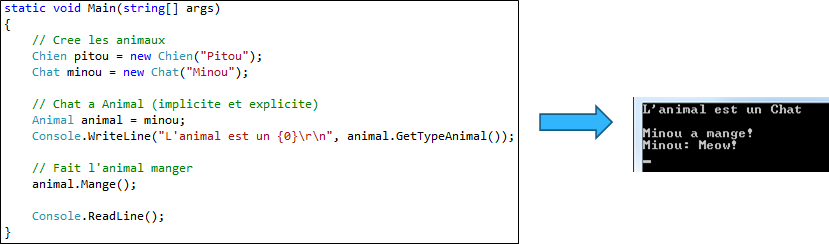

Grâce à ces techniques de conversion, un objet d’une classe dérivée peut être passé en paramètres à une méthode acceptant seulement son type base.

Cette même technique peut être appliquée à des collections génériques acceptant seulement le type de base.

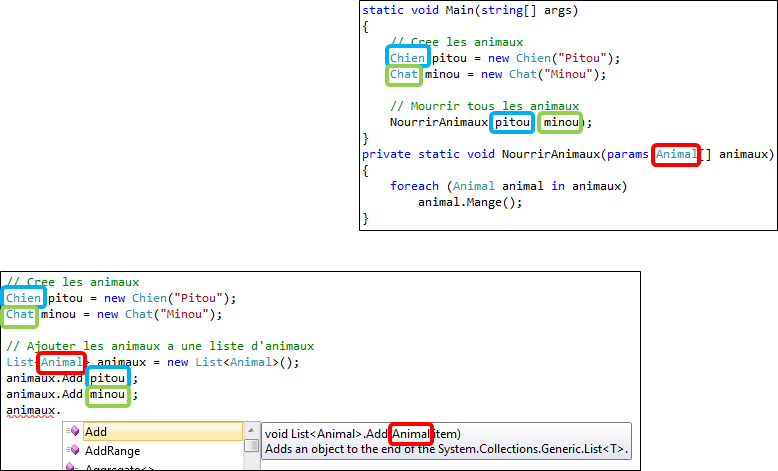

## Le polymorphisme

Le principe de polymorphisme permet au programmeur d’implémenter ou de surcharger certains membres de la classe de base.

Le principe du polymorphisme peut seulement être appliqué à des membres de type.
- Virtuel (`virtual`)
- Abstrait (`abstract`)

### Surcharge de membre

Afin de surcharger un membre (que ce soit une méthode ou une propriété), il suffit d’ajouter le mot clé « `override` » avant le type de retour du membre.

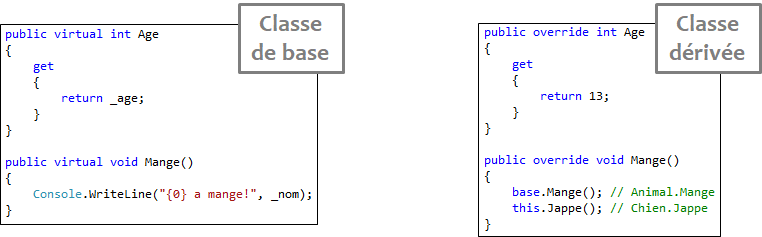

Lorsqu’un membre est surchargé dans le but de complémenter le code de base, il faut faire attention à ne pas utiliser le mot clé « `this` » pour référencer le membre de base, mais bien utiliser le mot clé « `base` »

En utilisant `this`, il est possible de déclencher un débordement de la pile (stack overflow).

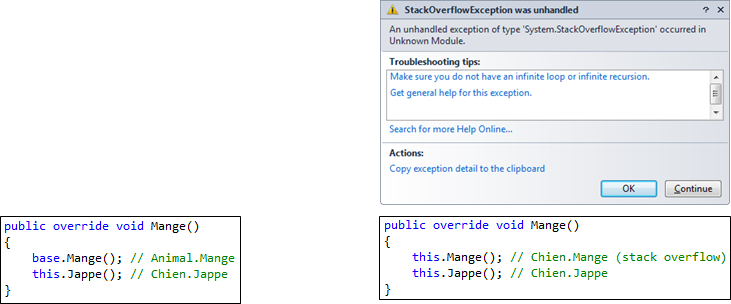

Dans le cas où un membre non-virtuel doit être surchargé, le programmeur peut utilisé le mot clé « `new` » pour indiquer que le membre dans la classe dérivé remplace (shadows) le membre de la classe de base.

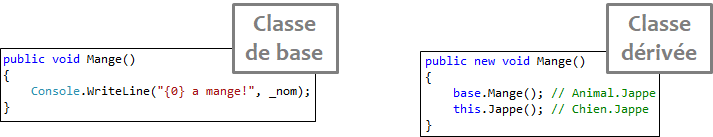

### Membre virtuel

Un membre contenant le mot clé « `virtual` » est déjà prédéfini avec du code.

Les membres virtuels peuvent être surchargés dans une classe dérivée afin de changer ou complémenter la logique du membre en question.

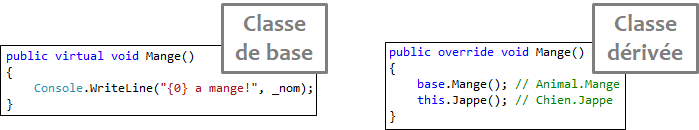

### Membre abstrait

Un membre contenant le mot clé « `abstract` » ne contient aucun code (il est composé simplement d’une signature).
  
  > Un membre abstrait peut seulement exister dans une classe abstraite.
  
Les membres abstraits doivent être surchargés dans une classe dérivée afin d’implémenter la logique du membre.

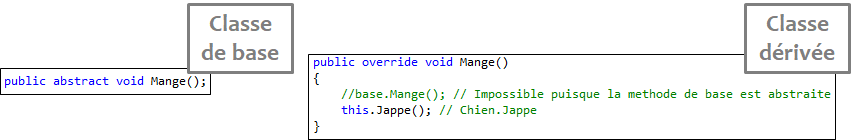


### Classe abstraite

Une classe abstraite ne peut pas être instanciée directement.

  > Une instance d’une classe dérivée (non abstraite) est la seule manière d’instancier indirectement une classe abstraite.

Une classe abstraite peut contenir des membres avec du code prédéfini (comme une classe normale).


### Classe et membre final

Une classe ou membre final contient le mot clé « `sealed` » dans sa signature.

  > Un membre peut être final seulement si celui-ci est surchargé avec le mot clé « `override` »

Une classe ne peut pas hériter d’une classe finale.

Un membre final indique que le membre ne peut plus être surchargé dans une classe dérivée.

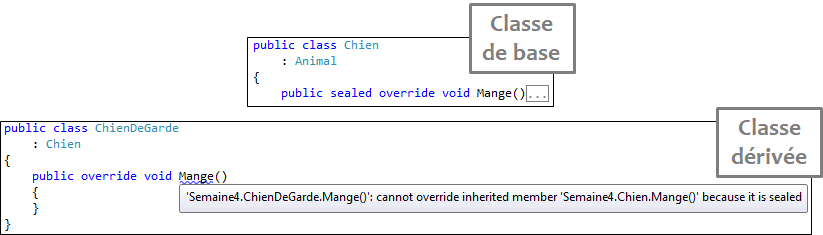

## Interface

Une interface est logiquement une classe abstraite contenant seulement des méthodes publiques abstraites.

Une interface est un type identifié à l’aide du mot clé « `interface` ».

Une interface sert à forcer l’implémentation de plusieurs méthodes à l’intérieur d’une classe

Une classe peut « implémenter » plusieurs interfaces.

 > Une classe doit implémenter toutes les méthodes définies par les interfaces qu’elle implémente


Le lien entre une classe implémentant une interface est de type « peut-faire ».

Un objet implémentant une interface peut également (comme les classes) être converti au type de l’interface directement afin de généraliser les objets.

**Exemple**

Tout animal et toute personne (humain) doivent manger et boire pour survivre
1. Créer une interface `IEtreVivant`
  1. Ajouter les méthodes `Bois` et `Mange`
1. Créer une classe Personne implémentant `IEtreVivant`
1. Modifier la classe Animal pour implémenter `IEtreVivant`



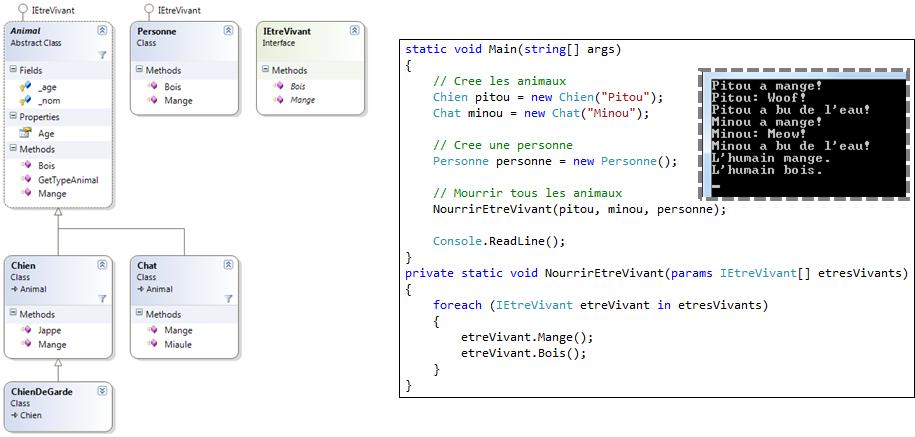